In [2]:
# Importing the dependency libraries
import numpy as np
import matplotlib.pyplot as plt
import csv


In [ ]:
# Instantiate np data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


In [66]:
# Create Linear_Regression Class

class Linear_Regression():
    def __init__(self) -> None:
        # Include the intercept term (w0)
        self.w0, self.w1, self.w2, self.w3 = np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn()
    
    def setTrainData(self, x_data, y_data) -> None:      
            self.x_data = x_data
            self.y_data = y_data
            if len(x_data) != len(y_data):
                raise ValueError(f"x_data and y_data must have the same length\ncurrent lengths: x_data = {len(x_data)}, y_data = {len(y_data)}")
            self.training_examples = len(x_data)
    
    def plotData(self) -> None:
        plt.scatter(self.x_data, self.y_data)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data')
        plt.show()

    def hypothesis(self, x) -> float:
        return self.w0 + self.w1 * x + self.w2 * x**2 + self.w3 * x**3
    
    def stochastic_gradient_descent(self, learning_rate: float, iterations: int) -> None:
        for _ in range(iterations):
            for i in range(self.training_examples):
                x = self.x_data[i]
                y = self.y_data[i]
                
                y_pred = self.hypothesis(x)
                error = y_pred - y
                
                self.w0 -= learning_rate * error
                self.w1 -= learning_rate * error * x
                self.w2 -= learning_rate * error * x**2
                self.w3 -= learning_rate * error * x**3


        
    def calculate_accuracy(self) -> None:
        total_error = 0
        for i in range(self.training_examples):
            y_pred = self.hypothesis(x_test[i])
            y_true = y_test[i]
            print(f"Prediction: {y_pred:.2f}, True: {y_true:.2f}")
            error = abs((y_true - y_pred) / y_true) * 100
            total_error += error

        average_error = total_error / self.training_examples
        accuracy = 100 - average_error
        print(f"Accuracy: {accuracy:.2f}%")

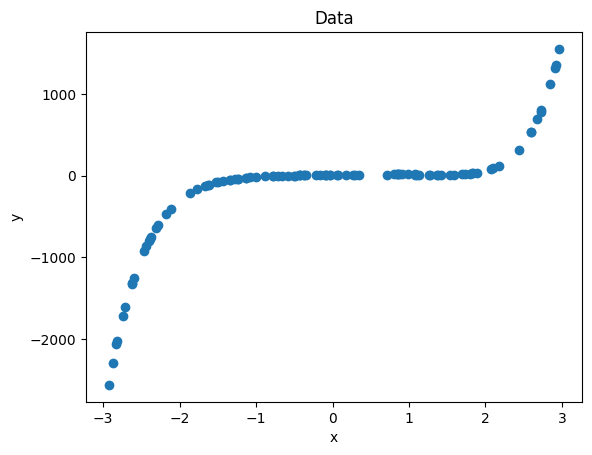

In [67]:
question_one = Linear_Regression()
question_one.setTrainData(x_train, y_train)
question_one.plotData()

In [ ]:
# The plotted image above looks very similar to an x^3 function.
# Therefore I will modify my linear regression equation in the Linear Regression Class to be Polynomial
question_one.stochastic_gradient_descent(learning_rate=0.00001, iterations=1)
question_one.calculate_accuracy()

Prediction: -63.68, True: 11.70
Prediction: 81.64, True: 3.59
Prediction: 94.04, True: 2.49
Prediction: -51.46, True: 11.06
Prediction: -86.56, True: 12.76
Prediction: -98.88, True: 13.12
Prediction: 114.51, True: -4.52
Prediction: -1.26, True: 8.37
Prediction: -37.53, True: 10.31
Prediction: 80.16, True: 3.70
Prediction: -33.48, True: 10.09
Prediction: -104.73, True: 13.10
Prediction: -28.36, True: 9.82
Prediction: -60.97, True: 11.56
Prediction: 109.42, True: -7.91
Prediction: -56.64, True: 11.33
Prediction: 22.78, True: 7.10
Prediction: -81.01, True: 12.53
Prediction: 41.94, True: 6.07
Prediction: 59.32, True: 5.08
Prediction: -9.13, True: 8.79
Prediction: -106.15, True: 13.03
Prediction: 113.43, True: -5.54
Prediction: 115.05, True: -3.11
Prediction: 100.26, True: 1.76
Prediction: 85.99, True: 3.24
Prediction: -105.79, True: 13.05
Prediction: 73.18, True: 4.20
Prediction: -88.72, True: 12.85
Prediction: -32.69, True: 10.05
Prediction: 79.00, True: 3.79
Prediction: 107.49, True: 0.5